In [1]:
import pandas as pd
import glob
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
trainimg_dir='data/boneage-training-dataset/boneage-training-dataset'
train= pd.read_csv('data/boneage-training-dataset.csv')

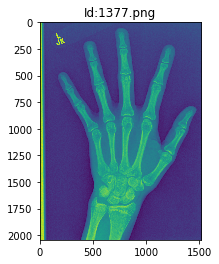

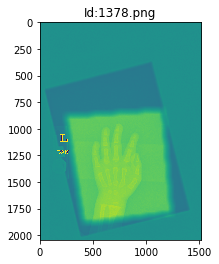

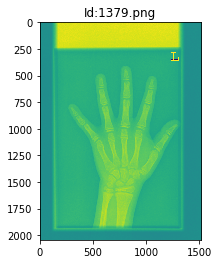

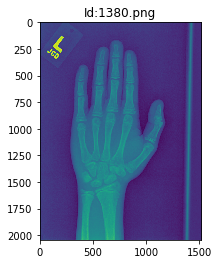

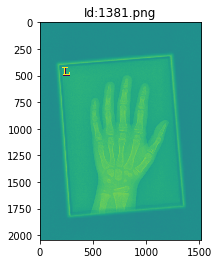

In [3]:
id=train['id']
for i in id[0:5]:
    img_name=str(i)+'.png'
    img = mpimg.imread('data/boneage-training-dataset/boneage-training-dataset/'+ img_name)  #array 형식
    plt.imshow(img)
    plt.title('Id:{}'.format(img_name))
    plt.show()

In [4]:
train

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False
...,...,...,...
12606,15605,50,False
12607,15606,113,False
12608,15608,55,False
12609,15609,150,True


In [5]:
train.loc[train['male']==False, 'gender']=1 #여자가 1
train.loc[train['male']==True, 'gender']=0 #남자가 0
train.drop(['male'], axis=1)

,id,boneage,gender
0,1377,180,1.0
1,1378,12,1.0
2,1379,94,1.0
3,1380,120,0.0
4,1381,82,1.0
...,...,...,...
12606,15605,50,1.0
12607,15606,113,1.0
12608,15608,55,1.0
12609,15609,150,0.0


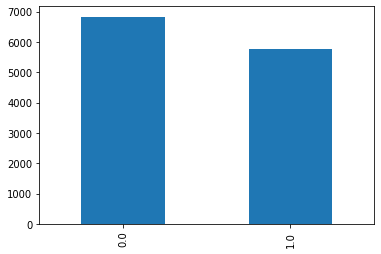

In [6]:
train['gender'].value_counts().plot(kind='bar')

#0.0    6833
#1.0    5778

(array([  91.,  406.,  831., 1127., 1824., 2344., 3126., 2182.,  571.,
         109.]),
 array([  1. ,  23.7,  46.4,  69.1,  91.8, 114.5, 137.2, 159.9, 182.6,
        205.3, 228. ]),
 <a list of 10 Patch objects>)

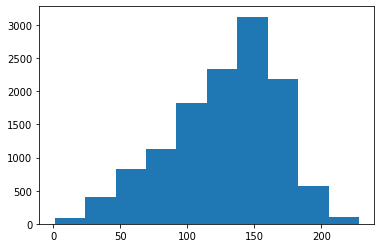

In [7]:
plt.hist(train['boneage'], 10)
#평균 127.3

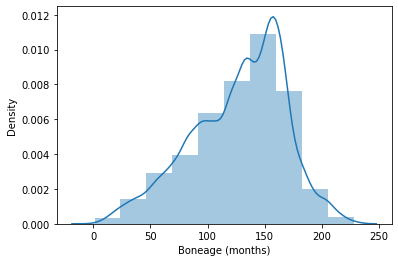

In [8]:
fig, ax = plt.subplots()
ax = sns.distplot(train['boneage'], bins=10)
ax.set(xlabel='Boneage (months)', ylabel='Density');

In [9]:
files = [trainimg_dir + str(i) + '.png' for i in train['id']]
train['file'] = files

In [10]:
train

,id,boneage,male,gender,file
0,1377,180,False,1.0,data/boneage-training-dataset/boneage-training...
1,1378,12,False,1.0,data/boneage-training-dataset/boneage-training...
2,1379,94,False,1.0,data/boneage-training-dataset/boneage-training...
3,1380,120,True,0.0,data/boneage-training-dataset/boneage-training...
4,1381,82,False,1.0,data/boneage-training-dataset/boneage-training...
...,...,...,...,...,...
12606,15605,50,False,1.0,data/boneage-training-dataset/boneage-training...
12607,15606,113,False,1.0,data/boneage-training-dataset/boneage-training...
12608,15608,55,False,1.0,data/boneage-training-dataset/boneage-training...
12609,15609,150,True,0.0,data/boneage-training-dataset/boneage-training...


In [11]:
train_df, valid_df = train_test_split(train, test_size = 0.2)
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 10088 validation 2523


In [12]:
from torchvision.models import vgg16
VGG16 = torchvision.models.vgg16(pretrained=True)

In [13]:
transform = transforms.Compose([
    transforms.Resize((384,384)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])